In [1]:
# import...
import numpy as np
import os
import matplotlib.pyplot as plt
import xarray as xr
import warnings
import sys
import pandas as pd
import datetime
from matplotlib.dates import DateFormatter

os.chdir(  "/Users/etmu9498/research/code/scripts-winter2023")
import helper_fns_winter2023 as helper_fns
os.chdir(  "/Users/etmu9498/research/code/scripts-winter2023/cloud-top-height-stats")
import eyewall_metadata

In [23]:
# part 1.0: process data from SHIPS dataset to set up for 2021 intensification analysis

# this code is based on "/scripts-winter2023/ships-data-munging/ships_plots"

# define tc names used in this analysis
tcnames_orig = ['fred', 'grace', 'henri', 'ida', 'sam']
tcnames = []
# only keep first 4 letters to match the format of the ships data
for i in range(len( tcnames_orig)):
    tcnames.append( tcnames_orig[i][0:4].upper())
year = '2021'

print(tcnames)

# load the full ships dataset
print( "Loading SHIPS dataset")
os.chdir(  "/Users/etmu9498/research/data/ships/")
file1 = open('lsdiaga_1982_2021_sat_ts_5day.txt', 'r')
Lines = file1.readlines()
# there are a bunch of lines in the total ships file!!
print( "SHIPS dataset created")
print( "Number of lines in dataset: " + str( len( Lines)))

# lists of lists holding important date, intensity, etc information for each tc of interest!
all_dates = []
all_time_since_start = []
all_datetimes = []
all_vmax = []
all_psurf = []
all_startdate = []
all_starttime = []


# do this for each tc name listed above
for strname in tcnames:
    # convenient variables for plotting
    dates = []
    time_since_start = []
    datetimes = []
    vmax = []
    psurf = []
    startdate = 0
    starttime = 0

    header_inds = []
    # go through all the lines
    for ind in range( len( Lines)):
        # get the heading lines, and look for this TC's cases!
        if 'HEAD' and strname  in Lines[ ind]:
            # only keep 2021 cases
            if Lines[ ind][ 6 : 8] == str( year[ 2:4]):
                header_inds.append( ind)

    # print valid header indices
    # print( header_inds)
    # do this for all headers
    for headeri, headerval in enumerate( header_inds):
        # add times to the list! increments of 6 hours
        if headeri == 0:
            time_since_start.append( 0)
            # append starting dates and times
            for i in range( headerval,  len( Lines) ):
                if 'HEAD' in Lines[ i]:
                    startdate = Lines[i][6:12]
                    starttime = Lines[i][13:15]
                    break
            print( 'start date and time updated')
        else:
            # otherwise, find the most recent time and add 6 hours!
            time_since_start.append( time_since_start[-1] + 6)

        # add dates
        for i in range( headerval,  len( Lines) ):
            if 'HEAD' in Lines[ i]:
                dates.append( Lines[i][6:12] )
                break
        # add datetime objects!!
        for i in range( headerval,  len( Lines) ):
            if 'HEAD' in Lines[ i]:
                month = int( Lines[i][8:10] )
                day = int( Lines[i][10:12] )
                hours = int( Lines[i][13:15] )
                datetime_orig = datetime.datetime( int( year), month, day, hours)
                datetimes.append( datetime_orig.strftime( "%m/%d %Hh"))
                break
        # search for vmax!
        for i in range( headerval,  len( Lines) ):
            if 'VMAX' in Lines[i]:
                vmax.append( int( Lines[i][12 : 15]) ) # the last 3 vals for vmax at 0 hours
                break
        # repeat for pressure
        for i in range( headerval,  len( Lines) ):
            if 'MSLP' in Lines[i]:
                psurf.append( int( Lines[i][11:15] )  ) # the last 3 vals for vmax at 0 hours
                break

    # once done looping through the headers, append the list of dates, pressures, etc to the all_ lists
    all_dates.append( dates)
    all_time_since_start.append( time_since_start)
    all_datetimes.append( datetimes)
    all_vmax.append( vmax)
    all_psurf.append( psurf)
    all_startdate.append( startdate)
    all_starttime .append( starttime)

# testing
print(len(all_psurf))
print(tcnames)
print(all_psurf)

i = 0
print(tcnames[i])
print(all_datetimes[i])

['FRED', 'GRAC', 'HENR', 'IDA', 'SAM']
Loading SHIPS dataset
SHIPS dataset created
Number of lines in dataset: 1884145
start date and time updated
start date and time updated
start date and time updated
start date and time updated
start date and time updated


In [2]:
# part 1.5: process munged data from NHC reports to set up for 2022 intensification analysis
tcnames_orig_2022 = ['earl', 'fiona', 'ian', 'julia']
# months aren't saved in the original excel files :/ so add them here! from noaa summary docs
months = ['09', '09', '09', '10']
print(tcnames_orig_2022)

# lists of lists holding important date, intensity, etc information for each tc of interest!
# all_dates22 = []
# all_time_since_start22 = []
all_datetimes22 = []
all_vmax22 = []
all_psurf22 = []
# all_startdate22 = []
# all_starttime22 = []

# where 2022 munged data resides
data_path_2022 = "/Users/etmu9498/research/data/intensity-6-hour-updates-temp/"

# do this for each tc name listed above
for stri, strname in enumerate( tcnames_orig_2022):
    datetimes = []

    # read in this tc's dataset
    os.chdir(data_path_2022)
    data = pd.read_excel( "tc-" + strname + ".xlsx")

    # cycle through each datetime and correct it
    for di, dval in enumerate(data['Date/Time (UTC)'].values):
        datetimes.append( months[stri] + '/' + dval[0:2] + ' ' + dval[5:7] + 'h')
    
    # append the list of dates, pressures, etc to the all_ lists
    all_datetimes22.append( datetimes )
    all_vmax22.append( data['Wind Speed (kt)'].values.tolist())
    all_psurf22.append( data['Pressure (mb)'].values.tolist())


['earl', 'fiona', 'ian', 'julia']


In [3]:
# testing
# for i in range(len(tcnames_orig_2022)):
#     print(tcnames_orig_2022[i])
#     for j in range(len( all_datetimes22[i])):
#         print(all_datetimes22[i][j])
#         print(all_vmax22[i][j])
#     print('\n')

# data

{'eyewall_limits': {'0830': [()], '0905': [(10.06, 10.32), (10.81, 11.02), (12.045, 12.193), (12.984, 13.201)], '0906': [(11.18, 11.38), (12.29, 12.54), (13.41, 13.63)], '0908': [(10.44, 10.58), (11.79, 11.95), (12.93, 13.02)], '0916': [(10.29, 10.514), (11.58, 11.73), (12.96, 13.196)], '0917': [(9.4, 9.6), (11.96, 12.197)], '0918': [(9.97, 10.03), (11.2, 11.27), (12.38, 12.53), (13.27, 13.55), (14.29, 14.45)], '0920': [(10.37, 10.47), (11.43, 11.47), (12.78, 12.85), (13.97, 14.04)], '0924': [()], '0925': [(10.67, 10.914), (11.884, 12.093)], '0926': [(10.15, 10.24), (11.42, 11.51), (11.6, 11.67), (12.69, 12.83)], '1008': [()]}, 'intensity': {'0830': 0, '0905': 45, '0906': 55, '0908': 90, '0916': 45, '0917': 50, '0918': 55, '0920': 100, '0924': 40, '0925': 45, '0926': 65, '1008': 60}, 'category': {'0830': 'td', '0905': 'ts', '0906': 'ts', '0908': 'wh', '0916': 'ts', '0917': 'ts', '0918': 'ts', '0920': 'sh', '0924': 'ts', '0925': 'ts', '0926': 'wh', '1008': 'ts'}, 'names': {'earl': 'earl

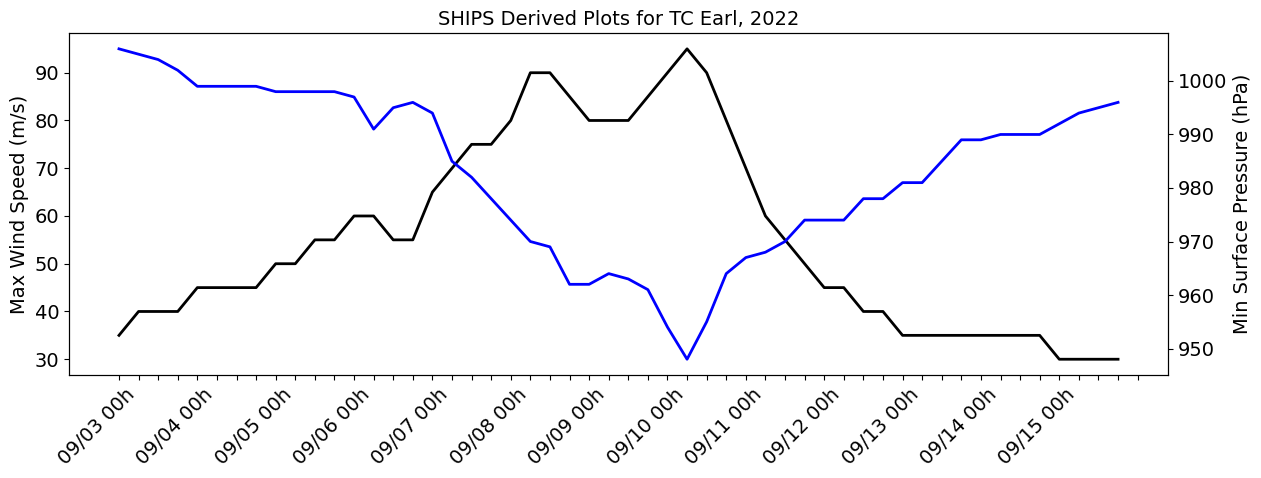

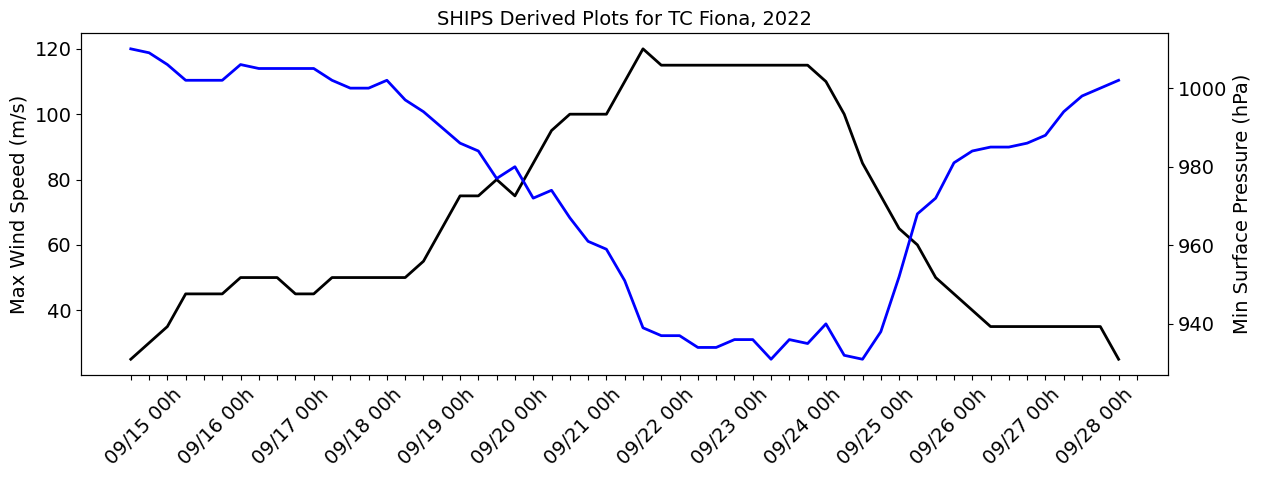

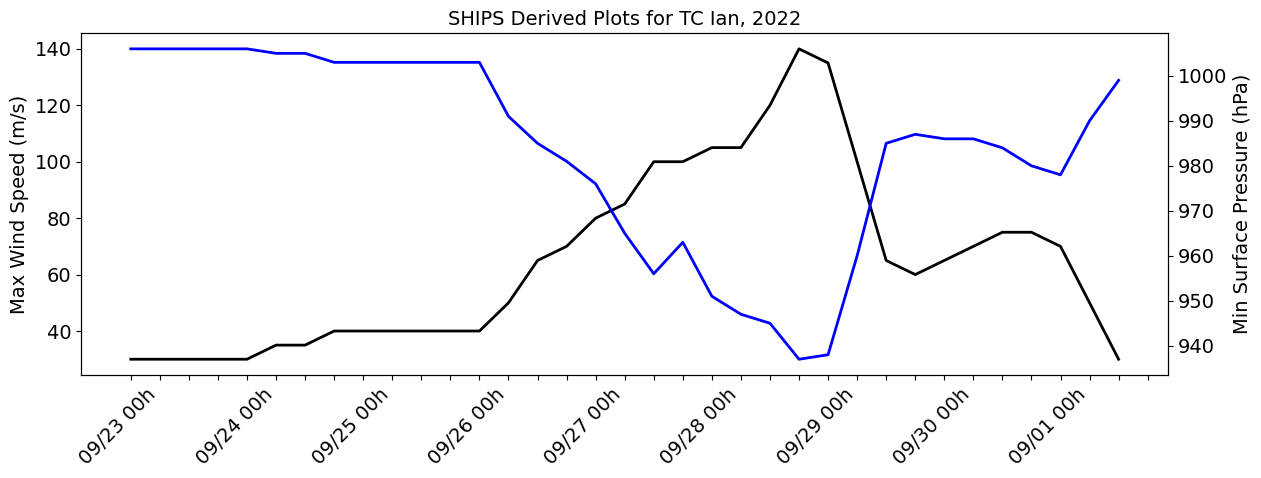

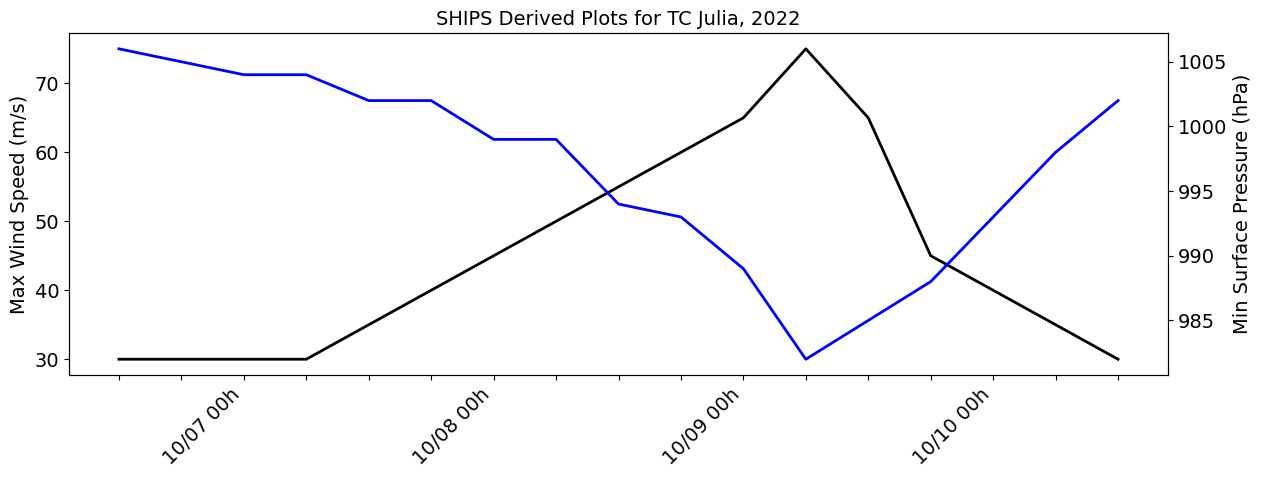

In [4]:
# part 2: make intensity plots for 2021 data to confirm that data processing steps went well!
year = '2022'
if year == '2021':
    names = tcnames_orig
elif year == '2022':
    names = tcnames_orig_2022

# load crl metadata here
metadata = eyewall_metadata.all_metadata()
print( metadata[year])

    
for tci, tcname in enumerate(names):
    if year == '2021':
        datetimes = all_datetimes[tci]
        vmax = all_vmax[tci]
        psurf = all_psurf[tci]
    elif year == '2022':
        datetimes = all_datetimes22[tci]
        vmax = all_vmax22[tci]
        psurf = all_psurf22[tci]
    tcname = names[tci].title()

        
    plt.figure( figsize = (12, 5))
    helper_fns.change_font_sizes( 14, 14)
    lw = 2
    n = 4  # Keep every 4th label

    plt.title( "SHIPS Derived Plots for TC " + tcname + ", " + year)
    plt.plot( datetimes, vmax, c='k', linewidth=lw)
    plt.ylabel( "Max Wind Speed (m/s)")
    plt.xticks(rotation=45, ha="right")

    ax = plt.gca()
    fig = plt.gcf()
    fig.tight_layout()

    ax2 = ax.twinx()
    ax2.plot( datetimes, psurf, c='b', linewidth=lw)
    ax2.set_ylabel( "Min Surface Pressure (hPa)")
    ax2.set_xlabel('Date')
    
    # trimming down the number of x labels
    labels = ax.xaxis.get_ticklabels()
    for di, dateval in enumerate(datetimes):    
        # remove all labels not at 0 utc
        if dateval[-3:-1] != '00':
            labels[di].set_visible(False)

    # old attempts at setting xlabels
    # [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    # change the datetime format on the x axis to just dates
    # myFmt = DateFormatter('%m/%d')
    # ax.xaxis.set_major_formatter(myFmt)

    
    # add vertical lines representing the 
    crl_names = metadata[year]['names']
    # print(crl_names)
    
    print("Plot for TC " + tcname + " Created")
    

In [ ]:
# part 3: actually calculate